# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import packages
import pandas as pd,numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Reading & Understanding

In [3]:
#read data
df=pd.read_csv('day.csv')


In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#view initial shape
df.shape

(730, 16)

In [6]:
#check info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values in the dataset

In [7]:
#check duplicates
df.duplicated().sum()

0

There are no duplicate rows

In [8]:
#statistical description
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dropping irrelevant features
 - instant is index - we can drop it
 - dteday is conveying the same meaning as yr & mnth
 - casual & registered can be removed as it totals to the target value 'cnt' & possibly be a reason of data leakage

In [9]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation
#### Mapping data according to dictionary
this step is done prior to visualization so that it can have meaningful item names

In [11]:
df.season = df.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [12]:
df.yr = df.yr.map({0: '2018',1:'2019'})

In [13]:
import calendar
df.mnth = df.mnth.apply(lambda x:calendar.month_name[x])
df.mnth = df.mnth.apply(lambda x:x[:3])


In [14]:
df.weekday = df.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thr",5:"Fri",6:"Sat"})


In [15]:
df.weathersit = df.weathersit.map({1:'Clear_FewClouds_PartlyCloudy',
                                   2:'Mist_CloudyMist_BrokenClouds_FewClouds', 
                                   3:'LightSnow_LightRain_Thunderstorm_ScatteredClouds',
                                   4:'HeavyRain_IcePallets_Thunderstorm_Mist_Snow_Fog'})


# Data Visualization

First we categorize features into categoricals & continuous

In [16]:
cat_f=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
cont_f=['temp', 'atemp', 'hum', 'windspeed','cnt']


### Univariate Analysis

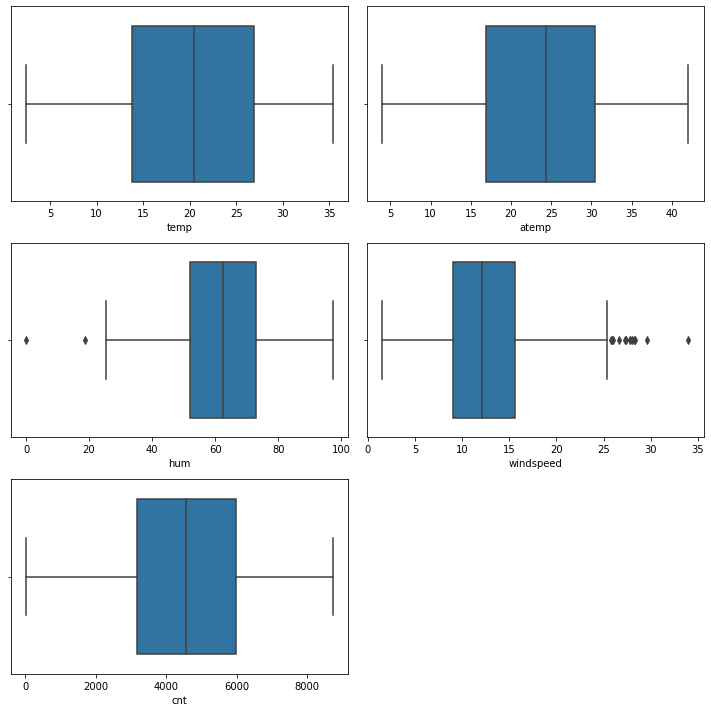

In [17]:
plt.figure(figsize=(10,10))
for i in list(enumerate(cont_f)):
    plt.subplot(3,2, i[0]+1)
    sns.boxplot(df[i[1]])
plt.tight_layout()
plt.show()

In [69]:
# function to get outlier percentage
def outliers(x):
    iqr = df[x].quantile(0.75)-df[x].quantile(0.25)
    upper = df[x].quantile(0.75)+iqr*1.5
    lower = df[x].quantile(0.25)-iqr*1.5
    per = ((df[x]<lower).sum()+(df[x]>upper).sum())/len(df[x])*100
    per = round(per,2)
    return per

print('outlier% (hum): ', outliers('hum'))
print('outlier% (windspeed): ', outliers('windspeed'))


outlier% (hum):  0.27
outlier% (windspeed):  1.78


## Inferences
- There are some outliers in the hum & windspeed but it does not seem to effect much

### Bivariate Analysis

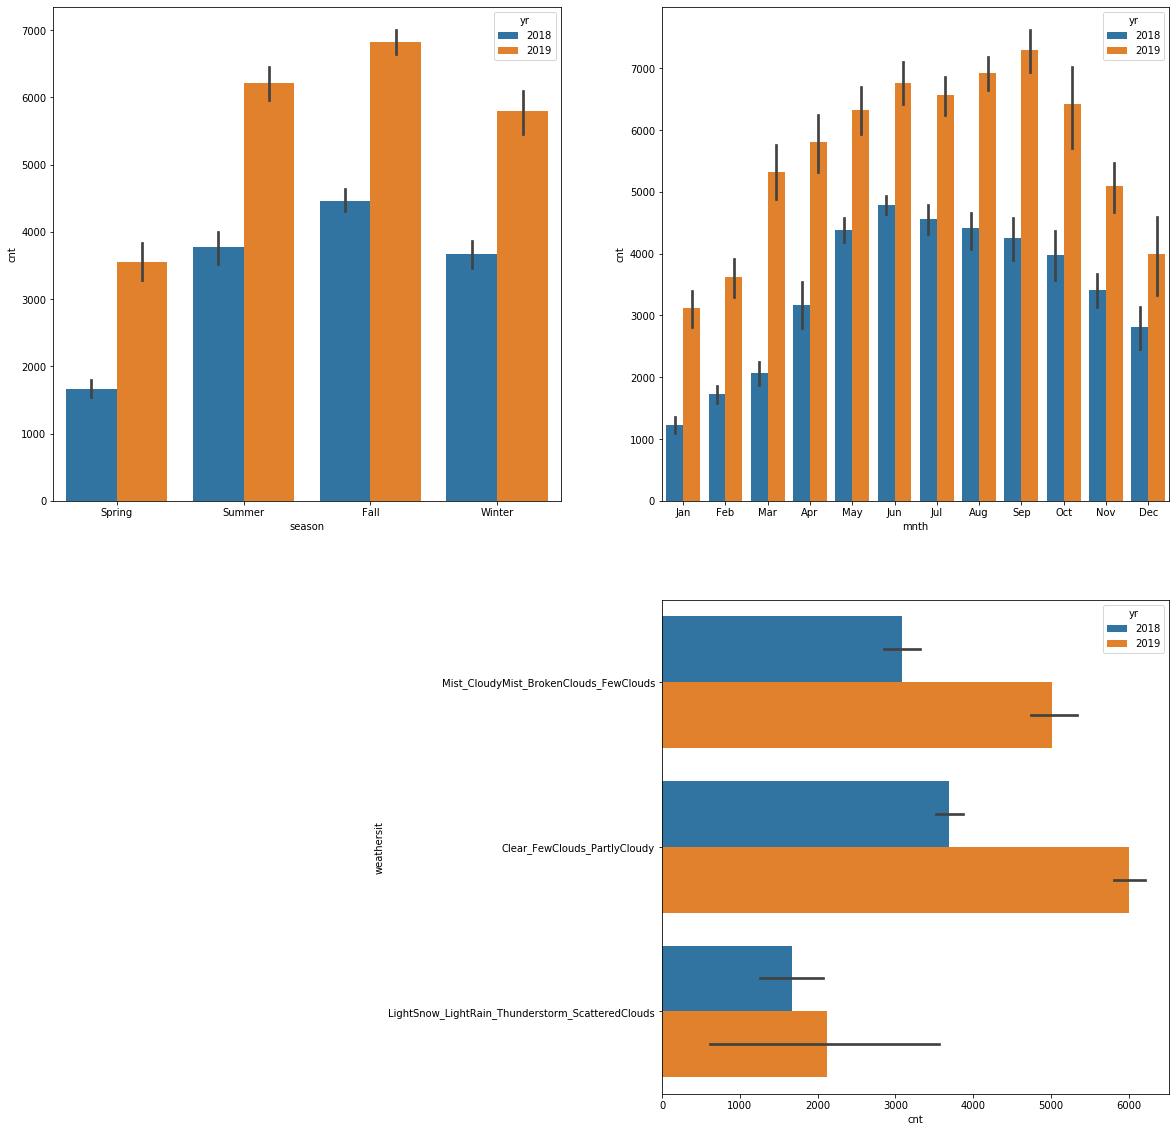

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.barplot(x=df.season,y=df.cnt,hue=df.yr,data=df)
plt.subplot(2,2,2)
sns.barplot(x=df.mnth,y=df.cnt,hue=df.yr,data=df)
plt.subplot(2,2,4)
sns.barplot(y=df.weathersit,x=df.cnt,hue=df.yr,data=df)
plt.show()

## Inferences
- The overall trend increases in 2019
- Summer,winter & fall sees good rentals
- the trend increases from march then dips in december
- rentals is low for LightSnow_LightRain_Thunderstorm_ScatteredClouds

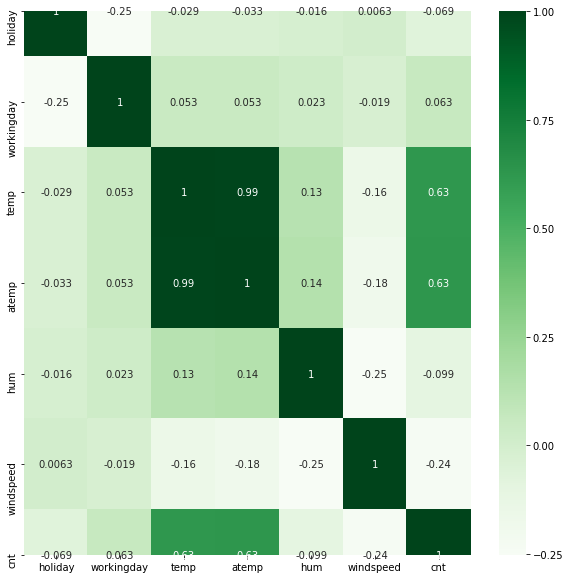

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

### Inferences
- The temp & atemp is highly correlated but we will not drop them now, we will let the model decide which is more important
- hum, holiday & windspeed is negatively correlated with cnt

### Continuous Variables

Assumption 1 - Linear relationship between X & Y

The relationship is not exactly linear but temp & atemp does show some linear relationship

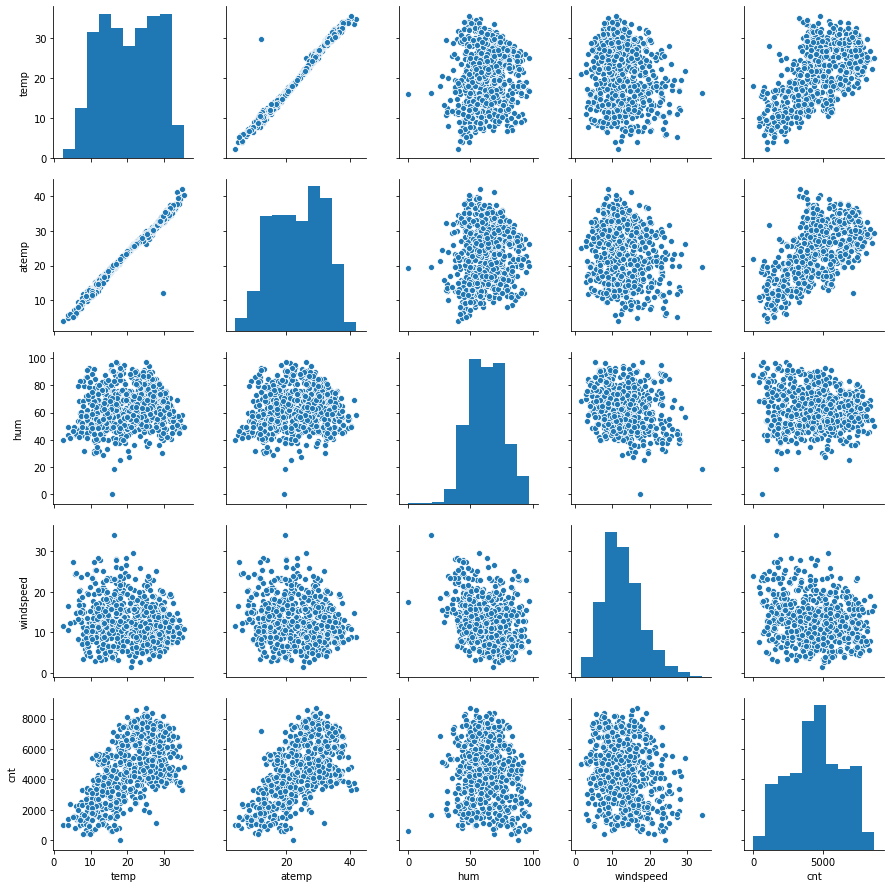

In [20]:
sns.pairplot(data=df[cont_f])

### Categorical Variables

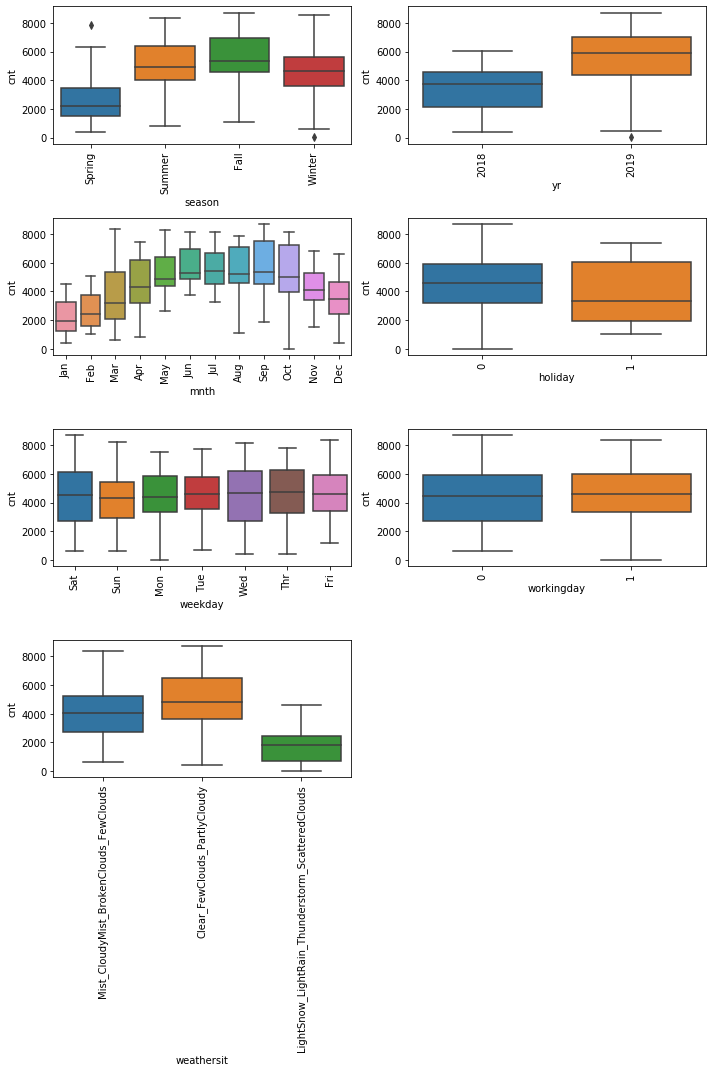

In [21]:
plt.figure(figsize=(10,15))
for i in list(enumerate(cat_f)):
    plt.subplot(4,2, i[0]+1)
    sns.boxplot(x=df[i[1]],y=df.cnt,data=df)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Inferences
- The number of rentals increased in 2019
- The rentals increase from summer & decreases towards winter but is still higher than Spring
- The rentals increases from Aprill but dips in July & is most in september
- There is a dip during holidays & non workingday
- There is no rentals during Heavy Rain or Ice pallets

# Data Preparation Contd..

### Dummy Variables
Creating dummy variables for categoricals

In [22]:
dummy=df[['season','mnth','weathersit','weekday','yr']]
dummy=pd.get_dummies(dummy,drop_first=True)

df=pd.concat([df,dummy],axis=1)

In [23]:
df.drop(['season','mnth','weathersit','weekday','yr'],axis=1,inplace=True)

In [24]:
#present shape
df.shape

(730, 30)

In [25]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,yr_2019
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Derived Column
Created one derived feature 'Windchill Factor' but removed it since it was left out in RFE

### Train Test Split
Splitting the dataset into train & test in 70:30 ratio

In [26]:
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

### Scaling
Scaling the training dataset

In [27]:
scaler=MinMaxScaler()

In [28]:
df_train[cont_f]=scaler.fit_transform(df_train[cont_f])

In [29]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,yr_2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [30]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,yr_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.080392,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.507843
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.272166,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we can see the min value is 0 & max is 1 after scaling

### Dividing data into dependent & independent variables

In [31]:
y_train=df_train.pop('cnt')
x_train=df_train


# Data Modelling and Evaluaion

First we will be building the model with all the given features in the dataset & remove them 1 by 1 using a combo of RFE & VIF/P-Val

### Model Building

In [32]:
#Linear Regression Model
lr = LinearRegression()
lr.fit(x_train, y_train)
#dropping down features count to 15 from 30 using RFE
rfe = RFE(lr, 15)           
rfe = rfe.fit(x_train, y_train)


In [33]:
#Checking features selected by RFE
rfe_cols=x_train.columns[rfe.support_]
rfe_cols

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds',
       'weathersit_Mist_CloudyMist_BrokenClouds_FewClouds', 'weekday_Sat',
       'weekday_Sun', 'yr_2019'],
      dtype='object')

now using these columns we will proceed further & manually remove element as per statistical decisions following the statsmodel approach

In [34]:
x_train=x_train[rfe_cols]

In [35]:
#function for model creation
def model(x_train,y_train):
    x_train=sm.add_constant(x_train)
    lr=sm.OLS(y_train,x_train).fit()
    return lr,x_train

In [36]:
#VIF function
def VIF(x_train):
    X = x_train
    features = X.columns
    Vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif=pd.DataFrame({'Features':features,'VIF':Vif})
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

In [37]:
#adding constant & fitting model
lr,x_train=model(x_train,y_train)

In [38]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.13e-191
Time:                        19:23:27   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [39]:
#VIF
VIF(x_train)


,Features,VIF
1,holiday,inf
2,workingday,inf
13,weekday_Sat,inf
14,weekday_Sun,inf
6,season_Spring,5.02
3,temp,3.62
8,season_Winter,3.49
7,season_Summer,2.61
4,hum,1.91
12,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,1.57


Removing holiday since its P value is beyond 5%  standing at 37.3% so it is clearly insignificant & VIF is inf which means it is perfectly collinear

In [40]:
x_train=x_train.drop(['holiday'],axis=1)

### Model 2

In [41]:
#rebuilding without holiday
lr2,x_train=model(x_train,y_train)

In [42]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.13e-191
Time:                        19:23:28   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

According to the P values the selected features are all significant so we will check for multicollinearity using VIF(<5 - Good)

In [43]:
#VIF
VIF(x_train)

,Features,VIF
0,const,114.08
1,workingday,9.07
12,weekday_Sat,6.06
13,weekday_Sun,5.74
5,season_Spring,5.02
2,temp,3.62
7,season_Winter,3.49
6,season_Summer,2.61
3,hum,1.91
11,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,1.57


We see many features having VIF>5 even though the P val made it significant. We will remove the 'workingday' & check again

## Model 3

In [44]:
x_train=x_train.drop(['workingday'],axis=1)

In [45]:
#rebuilding without workingday
lr3,x_train=model(x_train,y_train)

In [46]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.8
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.36e-189
Time:                        19:23:28   Log-Likelihood:                 509.56
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     496   BIC:                            -931.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [47]:
#VIF
VIF(x_train)


,Features,VIF
0,const,74.90
4,season_Spring,5.01
1,temp,3.62
6,season_Winter,3.49
5,season_Summer,2.61
2,hum,1.91
10,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,1.57
7,mnth_Jul,1.49
8,mnth_Sep,1.29
9,weathersit_LightSnow_LightRain_Thunderstorm_Sc...,1.25


we saw weekday_sat having a reducing VIF but the significance no longer holds true as P val is 0.218>0.05 so we remove it

## Model 4

In [48]:
x_train=x_train.drop(['weekday_Sat'],axis=1)

In [49]:
#rebuilding without weekday_Sat)
lr4,x_train=model(x_train,y_train)

In [50]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.31e-190
Time:                        19:23:28   Log-Likelihood:                 508.78
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     497   BIC:                            -936.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [51]:
#VIF
VIF(x_train)

,Features,VIF
0,const,74.37
4,season_Spring,5.01
1,temp,3.61
6,season_Winter,3.49
5,season_Summer,2.61
2,hum,1.91
10,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,1.57
7,mnth_Jul,1.49
8,mnth_Sep,1.29
9,weathersit_LightSnow_LightRain_Thunderstorm_Sc...,1.25


season_Spring is having significance with p val 0.006 but has VIF>5 so we will drop it & rebuild model

## Model 5
Final Model


In [52]:
x_train=x_train.drop(['season_Spring'],axis=1)

In [53]:
#rebuilding without weekday_Sat
lr5,x_train=model(x_train,y_train)

In [54]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.40e-190
Time:                        19:23:29   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     498   BIC:                            -934.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [55]:
#VIF
VIF(x_train)

,Features,VIF
0,const,44.92
2,hum,1.88
1,temp,1.60
9,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,1.56
6,mnth_Jul,1.43
4,season_Summer,1.33
5,season_Winter,1.29
8,weathersit_LightSnow_LightRain_Thunderstorm_Sc...,1.24
7,mnth_Sep,1.19
3,windspeed,1.18


we see the P val is below 5% for all the features & also there is no issue of multicollinearity present so we can finalize this model & proceed with prediction.<br>The Adj R2 obtained on training data is 0.836 we need to compare it with test data

# Residual Analysis on Training data

Here we will be checking the error terms if they are normally distributed or not

In [56]:
y_pred_train=lr5.predict(x_train)

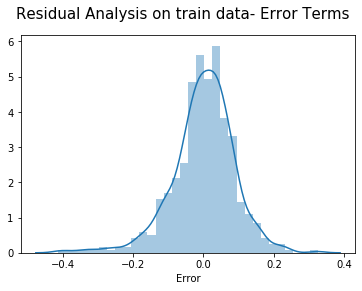

In [57]:
#distribution plot of error terms
plt.suptitle("Residual Analysis on train data- Error Terms",fontsize=15)
sns.distplot((y_train-y_pred_train))
plt.xlabel("Error")
plt.show()

Assumption 2 - The error terms are normally distributed
<br>so we can proceed with it to predict on test data

## Homoscedasticity Check

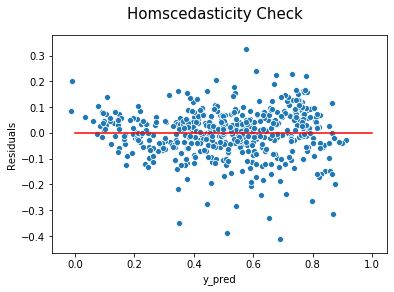

In [58]:
#distribution of error terms to check constant variance
plt.suptitle("Homscedasticity Check",fontsize=15)
a=sns.scatterplot(y_pred_train,(y_train-y_pred_train))
a=sns.lineplot([0,1],[0,0],color='red')
plt.xlabel("y_pred")
plt.ylabel("Residuals")
plt.show()

Assumption 3- Error terms have constant variance

there is no visible pattern so it can be confirmed it contains homscedascity

## Scaling
Scaling Test Data

In [59]:
df_test[cont_f]=scaler.transform(df_test[cont_f])

In [60]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Sep,weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,yr_2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.027397,0.319635,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.479452
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.163612,0.467403,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.500722
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#Separate out target feature
y_test=df_test.pop('cnt')
x_test=df_test
N=len(x_test)

In [62]:
#use the same features in test data as on training data
x_train=x_train.drop(['const'],axis=1)
x_test=x_test[x_train.columns]

In [63]:
#adding constant term
x_test=sm.add_constant(x_test)

In [64]:
#predict on test data
y_pred=lr5.predict(x_test)

# Model Evaluation

In [65]:
#R2 score on test data
r2_test=round(r2_score(y_test,y_pred),4)
print('The test data r2 score is : ', r2_test)

The test data r2 score is :  0.8034


In [66]:
#Adj r2 score for test data
#N= len(N)          # sample size
p =len(x_train.columns)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),4)
print('Adj. R-Squared for Test dataset: ', r2_test_adj)


Adj. R-Squared for Test dataset:  0.793


The model can explain 79.30% variance on test data

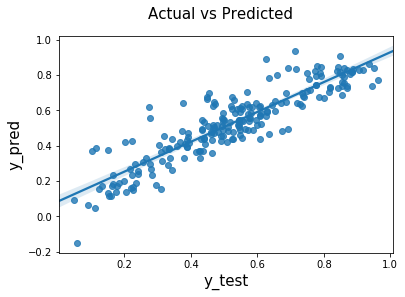

In [67]:
#Actual vs Predicted
fig=plt.figure()
ax1=fig.add_subplot(111)
plt.suptitle('Actual vs Predicted',fontsize=15)
#ax1.scatter(y_test,c='b',label='y_test')
#ax1.scatter(y_pred,c='r',label='y_pred')
sns.regplot(y_test,y_pred)
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_pred",fontsize=15)
plt.show()

The actual & predicted gets overlapped which shows the model can predict the change in actual data in a good way

In [68]:
#creating a dataframe of features & coefficients
coef=pd.DataFrame(lr5.params)
coef.insert(0,'Features',coef.index)
coef.rename(columns={0:'Coefficient'},inplace=True)
coef.reset_index(drop=True,inplace=True)
coef.sort_values(by='Coefficient',ascending=False,inplace=True)
coef

,Features,Coefficient
1,temp,0.598625
11,yr_2019,0.228436
0,const,0.223111
5,season_Winter,0.135878
7,mnth_Sep,0.091479
4,season_Summer,0.082251
10,weekday_Sun,-0.041966
6,mnth_Jul,-0.043909
9,weathersit_Mist_CloudyMist_BrokenClouds_FewClouds,-0.052904
2,hum,-0.174126


#### The top indicators of explaning the demand are 
- temp
- weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds
- yr_2019

#### Apart from those some other indicators are
- hum
- windspeed
- season (mainly in summer & winter)
- month(sep)

BoomBikes can take above indicators into consideration & offer business benifits to attract more customers & gain profit

The Positive coefficients depicts the increase in count for those parameters & Negative coefficient signifies decrease in count




### The Equation of the best fit line obtained is

cnt = 0.223111 + 0.598625 x temp + 0.228436 x yr_2019 + 0.135878 x season_Winter + 0.091479 x mnth_Sep + 0.082251 x season_Summer + (-0.041966) x weekday_Sun  + (-0.043909) x mnth_Jul + (-0.052904) x weathersit_Mist_CloudyMist_BrokenClouds_FewClouds + (-0.174126) x  hum + (-0.189487) x windspeed + (-0.235432) x weathersit_LightSnow_LightRain_Thunderstorm_ScatteredClouds


## Inferences

- Temperature is a deciding factor with high coefficient
- Rentals are high during summer & winter
- Month of september sees a rise in rentals while dips in July
- Humidity & windspeed acts as a hindrance to rentals
- Weather situation for mist,snow,clouds & rain also acts negatively